In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv('train.csv')
train_df.head(6)

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,999,5,Friday,6.811315e+10,-1,FINANCIAL SERVICES,1000.0
1,30,7,Friday,6.053882e+10,1,SHOES,8931.0
2,30,7,Friday,7.410811e+09,1,PERSONAL CARE,4504.0
3,26,8,Friday,2.238404e+09,2,PAINT AND ACCESSORIES,3565.0
4,26,8,Friday,2.006614e+09,2,PAINT AND ACCESSORIES,1017.0
5,26,8,Friday,2.006619e+09,2,PAINT AND ACCESSORIES,1017.0


In [3]:
train_df.shape

(647054, 7)

In [4]:
train_df.dtypes

TripType                   int64
VisitNumber                int64
Weekday                   object
Upc                      float64
ScanCount                  int64
DepartmentDescription     object
FinelineNumber           float64
dtype: object

In [5]:
train_df.loc[train_df.duplicated(keep=False)]

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
55,42,19,Friday,7.675336e+09,1,IMPULSE MERCHANDISE,8904.0
59,42,19,Friday,7.675336e+09,1,IMPULSE MERCHANDISE,8904.0
134,26,61,Friday,7.535309e+09,1,HARDWARE,5525.0
135,26,61,Friday,7.535309e+09,1,HARDWARE,5525.0
460,8,225,Friday,4.093000e+03,1,PRODUCE,4008.0
...,...,...,...,...,...,...,...
646430,24,191177,Sunday,7.065200e+09,1,COOK AND DINE,905.0
646514,39,191190,Sunday,7.893138e+10,1,PETS AND SUPPLIES,6210.0
646525,39,191190,Sunday,7.893138e+10,1,PETS AND SUPPLIES,6210.0
646773,44,191277,Sunday,6.791453e+09,1,IMPULSE MERCHANDISE,347.0


In [6]:
train_df.drop_duplicates(inplace=True)

In [7]:
train_df.isna().sum()

TripType                    0
VisitNumber                 0
Weekday                     0
Upc                      2878
ScanCount                   0
DepartmentDescription    1266
FinelineNumber           2878
dtype: int64

In [8]:
train_df.loc[train_df['Upc'].isna()].equals(train_df.loc[train_df['FinelineNumber'].isna()])

True

In [9]:
d1 = train_df.loc[train_df['DepartmentDescription'].isna()]
d1['Upc'].isna().sum()

1266

In [10]:
train_df.dropna(subset = ['DepartmentDescription'],inplace=True)
train_df.shape

(640084, 7)

In [11]:
d2 = train_df.loc[train_df['Upc'].isna()]
print(d2.shape)
d2['DepartmentDescription'].unique()

(1612, 7)


array(['PHARMACY RX'], dtype=object)

In [12]:
train_df.loc[train_df['DepartmentDescription']=='PHARMACY RX'].shape[0]

1763

In [13]:
# Take all FinelineNumber values of PHARMACY RX Products
f_values = train_df.loc[train_df['DepartmentDescription']=='PHARMACY RX']['FinelineNumber'].unique()
f_values = list(f_values)

# Pop the useless nan value from list
f_values.pop(0)

fnum_dict = {}

# Take for each fineline number category the number of items they contain
for f in f_values:
    unique_count = train_df.loc[train_df['FinelineNumber'] == f]['Upc'].nunique()
    fnum_dict[f] = unique_count 
    
fnum_list = sorted(fnum_dict.items(),reverse=True)
most_common_fl_number = fnum_list[0][0]


# Find the most popular item
s1 = train_df.loc[train_df['FinelineNumber'] == most_common_fl_number]['Upc'].value_counts()
most_common_item = s1.index[0]


print('     Most Popular\n')
print('FinelineNumber: '+str(most_common_fl_number))
print('\nUpc: '+str(most_common_item))

# Fill NaN with most popular FinelineNumber
train_df['FinelineNumber'].fillna(most_common_fl_number,inplace=True)

# Fill NaN with most popular Upc
train_df['Upc'].fillna(most_common_item,inplace=True)

     Most Popular

FinelineNumber: 5615.0

Upc: 84110100530.0


In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 640084 entries, 0 to 647053
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   TripType               640084 non-null  int64  
 1   VisitNumber            640084 non-null  int64  
 2   Weekday                640084 non-null  object 
 3   Upc                    640084 non-null  float64
 4   ScanCount              640084 non-null  int64  
 5   DepartmentDescription  640084 non-null  object 
 6   FinelineNumber         640084 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 39.1+ MB


In [15]:
train_df.head(5)

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,999,5,Friday,6.811315e+10,-1,FINANCIAL SERVICES,1000.0
1,30,7,Friday,6.053882e+10,1,SHOES,8931.0
2,30,7,Friday,7.410811e+09,1,PERSONAL CARE,4504.0
3,26,8,Friday,2.238404e+09,2,PAINT AND ACCESSORIES,3565.0
4,26,8,Friday,2.006614e+09,2,PAINT AND ACCESSORIES,1017.0


In [16]:
train_df.describe()

,TripType,VisitNumber,Upc,ScanCount,FinelineNumber
count,640084.000000,640084.000000,6.400840e+05,640084.000000,640084.000000
mean,58.014098,96216.266195,3.069643e+10,1.111048,3730.959672
std,155.810477,55548.792482,9.101423e+10,0.701251,2777.682440
min,3.000000,5.000000,8.340000e+02,-12.000000,0.000000
25%,27.000000,49340.500000,3.400007e+09,1.000000,1404.000000
50%,39.000000,97117.000000,7.056087e+09,1.000000,3353.000000
75%,40.000000,144375.000000,3.023409e+10,1.000000,5501.000000
max,999.000000,191347.000000,9.789707e+11,71.000000,9998.000000


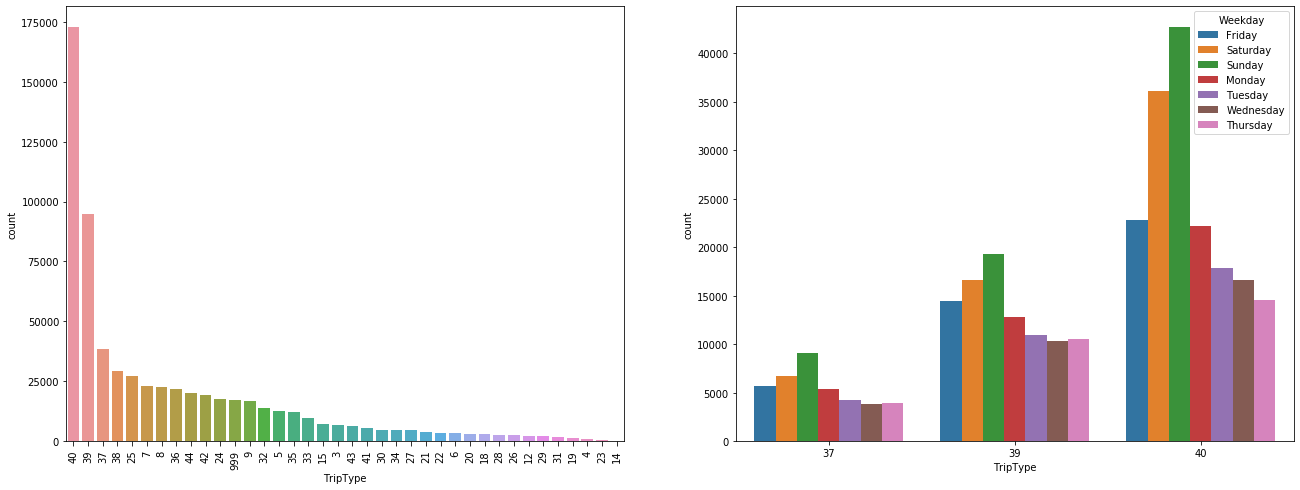

In [17]:
fig, ax = plt.subplots(1,2,figsize=(22,8))
tt_order = train_df['TripType'].value_counts().index
sns.countplot(train_df['TripType'],order=tt_order,ax=ax[0])
ax[0].tick_params(axis='x', rotation=90,size=5)
sns.countplot(x ='TripType',data=train_df.loc[train_df['TripType'].isin(list(tt_order[:3]))],hue='Weekday',ax=ax[1])
plt.show()

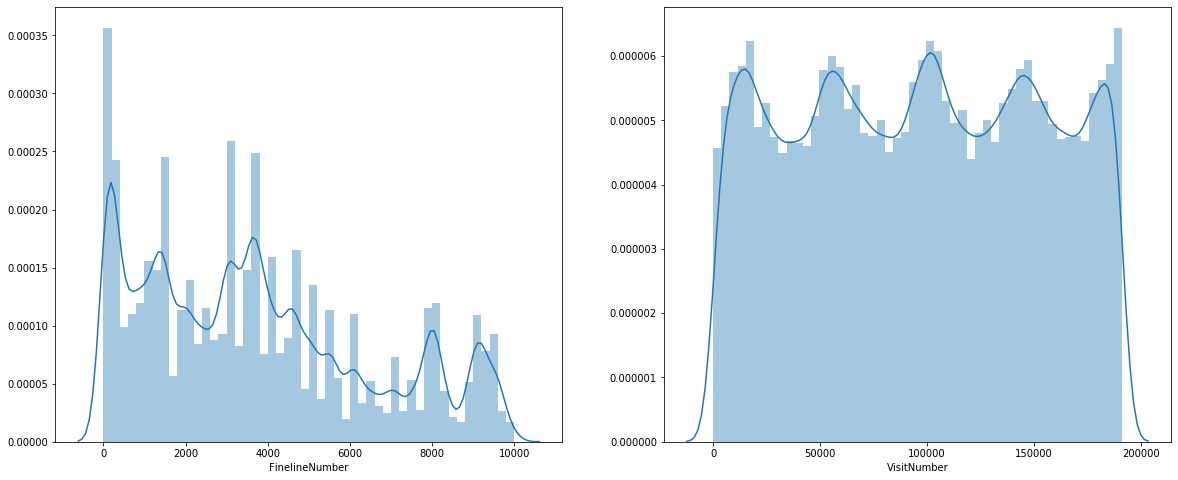

In [18]:
fig, ax = plt.subplots(1,2,figsize=(20,8))
sns.distplot(train_df['FinelineNumber'],ax=ax[0])
sns.distplot(train_df['VisitNumber'],ax=ax[1])
plt.show()

In [19]:
train_df.head(5)

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,999,5,Friday,6.811315e+10,-1,FINANCIAL SERVICES,1000.0
1,30,7,Friday,6.053882e+10,1,SHOES,8931.0
2,30,7,Friday,7.410811e+09,1,PERSONAL CARE,4504.0
3,26,8,Friday,2.238404e+09,2,PAINT AND ACCESSORIES,3565.0
4,26,8,Friday,2.006614e+09,2,PAINT AND ACCESSORIES,1017.0


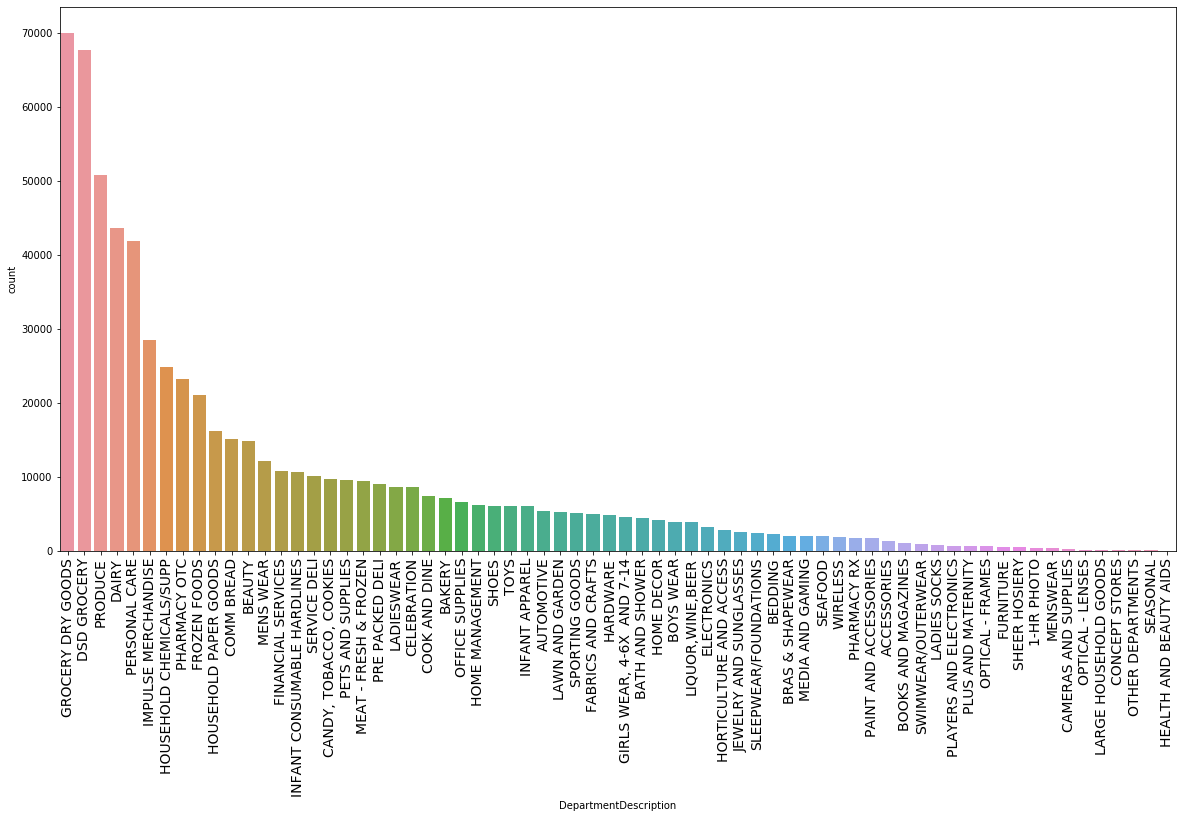

In [20]:
fig, ax = plt.subplots(figsize=(20,10))
order = train_df['DepartmentDescription'].value_counts().index
sns.countplot(train_df['DepartmentDescription'],order=order)
plt.xticks(rotation=90,fontsize=14)
plt.show()

In [21]:
print('Most Popular Departments: (Descending)\n')
for dept in order[:5]:
    print(dept)

Most Popular Departments: (Descending)

GROCERY DRY GOODS
DSD GROCERY
PRODUCE
DAIRY
PERSONAL CARE


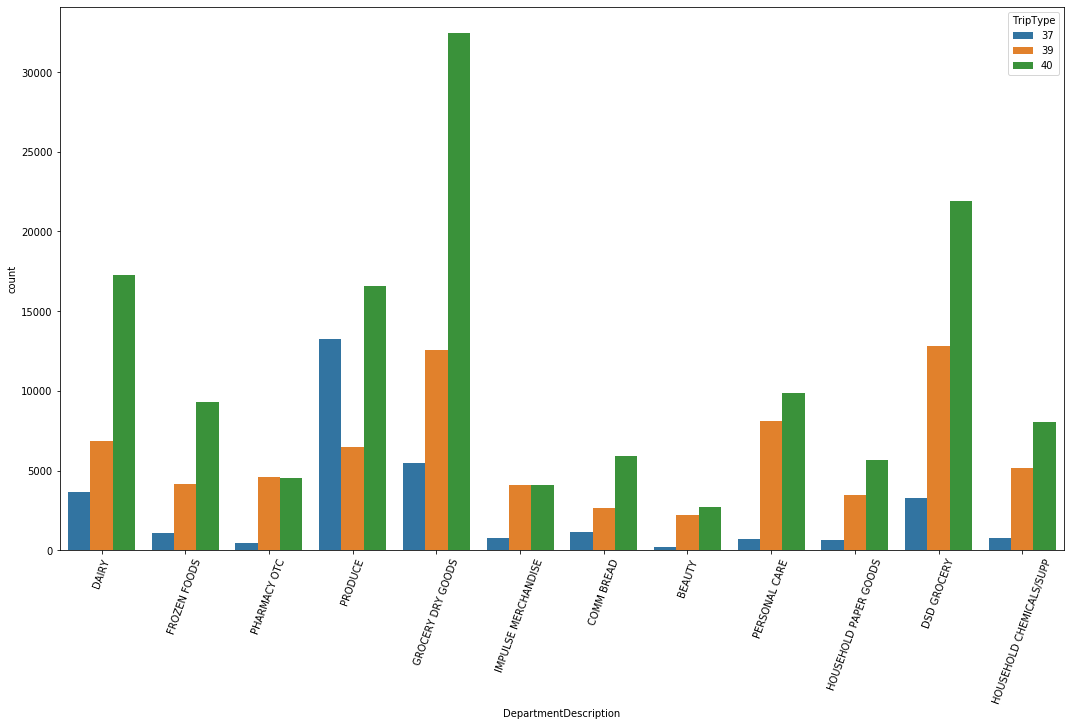

In [22]:
popular_depts = train_df.loc[train_df['DepartmentDescription'].isin(list(order[:12]))]
popular_depts = popular_depts.loc[popular_depts['TripType'].isin(list(tt_order[:3]))]
fig, ax = plt.subplots(figsize=(18,10))
sns.countplot(x ='DepartmentDescription',data=popular_depts,hue='TripType')
plt.xticks(rotation=70)
plt.show()

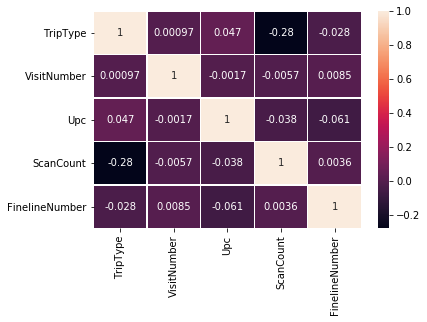

In [23]:
corr_mat = train_df.corr()
sns.heatmap(corr_mat,linewidths=.3,annot=True)
plt.show()

In [24]:
visits_df = pd.DataFrame()

visits_df['Items Count'] = train_df.groupby(['VisitNumber'])['ScanCount'].sum()
visits_df['Unique Items'] = train_df.groupby(['VisitNumber'])['Upc'].count()
visits_df = visits_df.merge(train_df[['VisitNumber','Weekday','TripType']].drop_duplicates(),on='VisitNumber')

In [25]:
train_df['DepartmentDescription'].nunique()

68

In [26]:
d4 = train_df.groupby(['VisitNumber','DepartmentDescription'])['ScanCount'].sum().reset_index()

In [27]:
departments_df = pd.pivot_table(d4, values=['ScanCount'], index=['VisitNumber'],
                   columns=['DepartmentDescription'], aggfunc='sum').reset_index().fillna(0)


In [28]:
departments_df.columns = departments_df.columns.droplevel()
departments_df = departments_df.rename(columns={'': "VisitNumber"})
visits_df = visits_df.merge(departments_df,on='VisitNumber')

In [29]:
visits_df.head(5)

,VisitNumber,Items Count,Unique Items,Weekday,TripType,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,BAKERY,BATH AND SHOWER,...,SEAFOOD,SEASONAL,SERVICE DELI,SHEER HOSIERY,SHOES,SLEEPWEAR/FOUNDATIONS,SPORTING GOODS,SWIMWEAR/OUTERWEAR,TOYS,WIRELESS
0,5,-1,1,Friday,999,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7,2,2,Friday,30,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,8,27,22,Friday,26,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9,3,3,Friday,8,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10,3,3,Friday,8,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
from sklearn.preprocessing import LabelEncoder

le_w = LabelEncoder()
le_w.fit(visits_df['Weekday'])
weekday_mapping = dict(zip(le_w.classes_,le_w.transform(le_w.classes_)))
visits_df['Weekday'] = le_w.transform(visits_df['Weekday'])

#print(weekday_mapping)

In [31]:
#le_ds.inverse_transform(train_df['Department_encoded'][70658:70663])

In [32]:
train_df.drop(columns=['Weekday','DepartmentDescription'],inplace=True)

In [33]:
X = visits_df.drop(columns=['TripType'])
y = visits_df['TripType']

X.head(3)

,VisitNumber,Items Count,Unique Items,Weekday,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,BAKERY,BATH AND SHOWER,BEAUTY,...,SEAFOOD,SEASONAL,SERVICE DELI,SHEER HOSIERY,SHOES,SLEEPWEAR/FOUNDATIONS,SPORTING GOODS,SWIMWEAR/OUTERWEAR,TOYS,WIRELESS
0,5,-1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7,2,2,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,8,27,22,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
y

0        999
1         30
2         26
3          8
4          8
        ... 
95511     25
95512     22
95513     39
95514     39
95515      8
Name: TripType, Length: 95516, dtype: int64

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifiers = {}

In [36]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train)

knn_pred = knn.predict(X_test)
knn_acc = accuracy_score(y_test, knn_pred)
knn_f1 = f1_score(y_test, knn_pred, average='weighted')

classifiers['kNN'] = (knn,knn_acc,knn_f1)
#scores.append(knn_pred)

print('\nk Nearest Neighbors Classifier\n')
print('Accuracy: {:2.2%}'.format(knn_acc))
print('F1: {:2.2%}'.format(knn_f1))


k Nearest Neighbors Classifier

Accuracy: 12.14%
F1: 7.80%


In [37]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(200,200), max_iter=500, alpha=0.0001, verbose=0, tol=0.00001)
mlp.fit(X_train, y_train)

mlp_pred = mlp.predict(X_test)
mlp_acc = accuracy_score(y_test, mlp_pred)
mlp_f1 = f1_score(y_test, mlp_pred, average='weighted')

classifiers['MLP']= (mlp,mlp_acc,mlp_f1)
#scores.append(mlp_pred)

print('\nMLP Classifier\n')
print('Accuracy: {:2.2%}'.format(mlp_acc))
print('F1: {:2.2%}'.format(mlp_f1))



MLP Classifier

Accuracy: 12.73%
F1: 2.95%


In [38]:
from sklearn.svm import SVC

svm = SVC(kernel='poly')
svm.fit(X_train, y_train)

svm_pred = svm.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)
svm_f1 = f1_score(y_test, svm_pred, average='weighted')

classifiers['SVM'] = (svm,svm_acc,svm_f1)
#scores.append(svm_pred)

print('\nSupport Vector Classifier\n')
print('Accuracy: {:2.2%}'.format(svm_acc))
print('F1: {:2.2%}'.format(svm_f1))



Support Vector Classifier

Accuracy: 12.68%
F1: 2.85%


In [39]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

xgb_pred = xgb.predict(X_test)
xgb_acc = accuracy_score(y_test, xgb_pred)
xgb_f1 = f1_score(y_test, xgb_pred, average='weighted')

classifiers['XGBoost'] = (xgb,xgb_acc,xgb_f1)
#scores.append(xgb_pred)

print('\nXGBoost Classifier\n')
print('Accuracy: {:2.2%}'.format(xgb_acc))
print('F1: {:2.2%}'.format(xgb_f1))


C:\Users\apost\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:32:48] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\apost\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +



XGBoost Classifier

Accuracy: 68.48%
F1: 67.43%


In [40]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
gb_acc = accuracy_score(y_test, gb_pred)
gb_f1 = f1_score(y_test, gb_pred, average='weighted')

classifiers['GradientBoost'] = (gb,gb_acc,gb_f1)
#scores.append(gb_pred)

print('\nGradient Boosting Classifier\n')
print('Accuracy: {:2.2%}'.format(gb_acc))
print('F1: {:2.2%}'.format(gb_f1))


Gradient Boosting Classifier

Accuracy: 67.78%
F1: 66.44%


In [41]:
from sklearn.ensemble import AdaBoostClassifier

ab = AdaBoostClassifier(n_estimators=50)
ab.fit(X_train, y_train)
ab_pred = ab.predict(X_test)
ab_acc = accuracy_score(y_test, ab_pred)
ab_f1 = f1_score(y_test, ab_pred, average='weighted')

classifiers['AdaBoost'] = (ab,ab_acc,ab_f1)
#scores.append(ab_pred)

print('\nAda Boost Classifier\n')
print('Accuracy: {:2.2%}'.format(ab_acc))
print('F1: {:2.2%}'.format(ab_f1))


Ada Boost Classifier

Accuracy: 20.17%
F1: 11.20%


In [42]:
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier(knn, max_samples=0.5, max_features=0.5)
bag.fit(X_train, y_train)
bag_pred = bag.predict(X_test)
bag_acc = accuracy_score(y_test, bag_pred)
bag_f1 = f1_score(y_test, bag_pred, average='weighted')

classifiers['kNN Bagging'] = (bag,bag_acc,bag_f1)
#scores.append(bag_pred)

print('\nk Nearest Neighnors Bagging Classifier\n')
print('Accuracy: {:2.2%}'.format(bag_acc))
print('F1: {:2.2%}'.format(bag_f1))


k Nearest Neighnors Bagging Classifier

Accuracy: 60.57%
F1: 57.00%


In [43]:
from sklearn.model_selection import cross_val_score

best_model_name = max(classifiers, key = lambda x: classifiers[x][1])
best_model = classifiers[best_model_name][0]

scores = cross_val_score(best_model,X,y,cv=5)

print('Cross validating best model: ' + best_model_name)
print('\n{:2.2%}'.format(np.mean(scores)))

C:\Users\apost\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\apost\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:44:29] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\apost\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[18:45:52] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:47:15] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:48:38] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:50:02] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

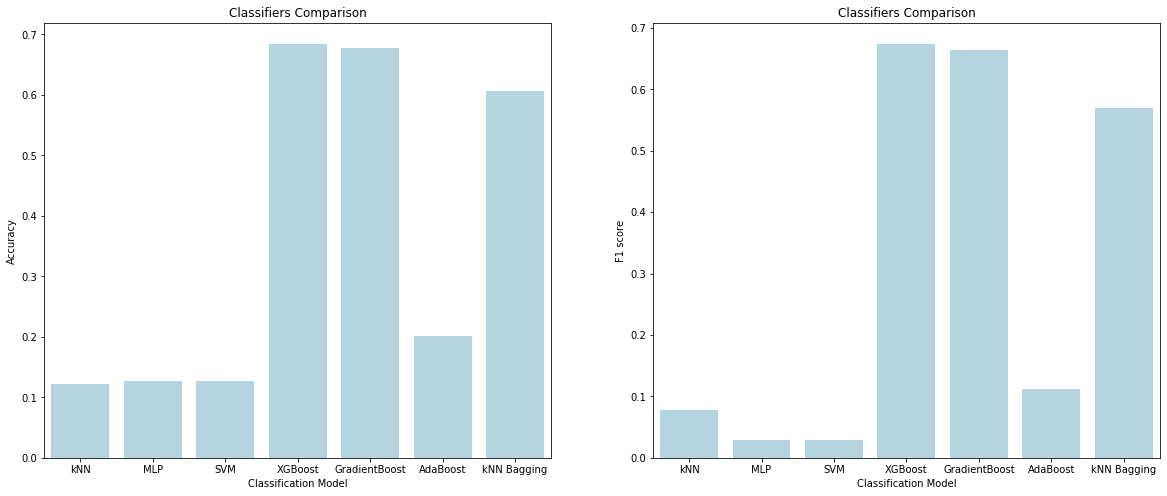

In [44]:
fig, ax = plt.subplots(1,2,figsize = (20, 8))
keys = list(classifiers.keys())
acc_values = []
f1_values = []

for key in keys:
    acc_values.append(classifiers[key][1])
    f1_values.append(classifiers[key][2])
    
sns.barplot(keys,acc_values,color = 'lightblue',ax=ax[0])
ax[0].set_xlabel('Classification Model')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Classifiers Comparison')

sns.barplot(keys,f1_values,color = 'lightblue',ax=ax[1])
ax[1].set_xlabel('Classification Model')
ax[1].set_ylabel('F1 score')
ax[1].set_title('Classifiers Comparison')

plt.show()